|--- Feature1 <= 127.50
|   |--- Feature7 <= 28.50
|   |   |--- Feature5 <= 45.40
|   |   |   |--- Feature5 <= 30.95
|   |   |   |   |--- Feature0 <= 7.50
|   |   |   |   |   |--- Feature6 <= 0.67
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Feature6 >  0.67
|   |   |   |   |   |   |--- Feature6 <= 0.69
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Feature6 >  0.69
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Feature0 >  7.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- Feature5 >  30.95
|   |   |   |   |--- Feature6 <= 0.50
|   |   |   |   |   |--- Feature2 <= 53.00
|   |   |   |   |   |   |--- Feature6 <= 0.16
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Feature6 >  0.16
|   |   |   |   |   |   |   |--- Feature0 <= 2.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Feature0 >  2.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |  

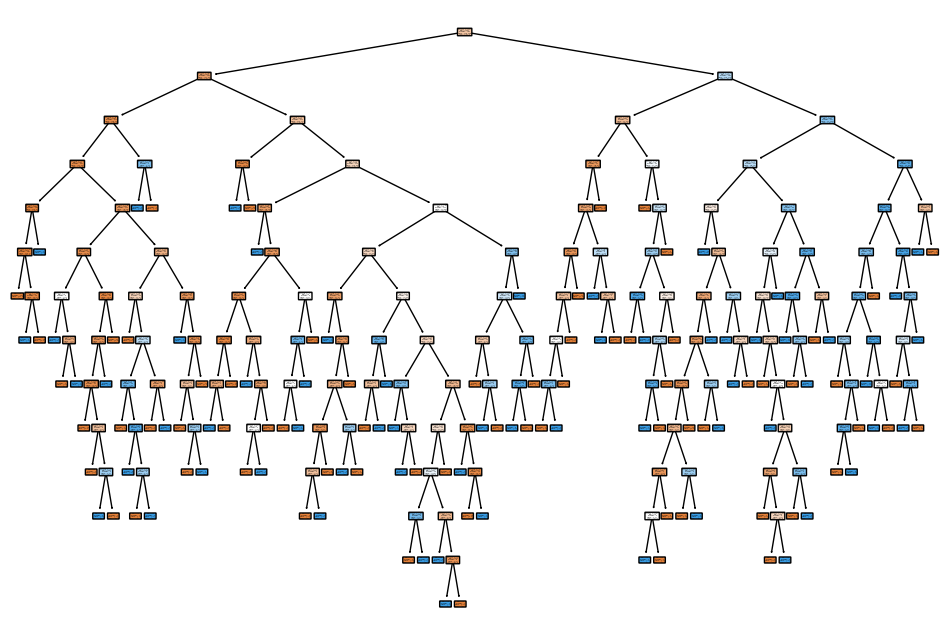

In [2]:
import csv
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import matplotlib.pyplot as plt

def load_dataset(filename):
    dataset = []
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        next(lines)  # Skip header
        for row in lines:
            for i in range(len(row)):
                row[i] = float(row[i])
            dataset.append(row)
    return dataset

def main():
    filename = 'knn_dataset.csv'
    dataset = load_dataset(filename)

    # Özellik ve etiketleri ayır
    X = [row[:-1] for row in dataset]
    y = [row[-1] for row in dataset]

    # Decision tree modelini oluştur
    model = DecisionTreeClassifier()
    model.fit(X, y)

    # Decision tree yapısını metin olarak göster
    tree_rules = export_text(model, feature_names=['Feature' + str(i) for i in range(len(X[0]))])
    print(tree_rules)

    # Decision tree yapısını çiz
    fig, ax = plt.subplots(figsize=(12, 8))
    tree.plot_tree(model, feature_names=['Feature' + str(i) for i in range(len(X[0]))], class_names=['Class 0', 'Class 1'], filled=True, rounded=True)
    plt.show()

if __name__ == "__main__":
    main()


|--- Feature1 <= 127.50
|   |--- Feature7 <= 28.50
|   |   |--- Feature5 <= 45.40
|   |   |   |--- class: 0.0
|   |   |--- Feature5 >  45.40
|   |   |   |--- class: 1.0
|   |--- Feature7 >  28.50
|   |   |--- Feature5 <= 26.35
|   |   |   |--- class: 0.0
|   |   |--- Feature5 >  26.35
|   |   |   |--- class: 0.0
|--- Feature1 >  127.50
|   |--- Feature5 <= 29.95
|   |   |--- Feature1 <= 145.50
|   |   |   |--- class: 0.0
|   |   |--- Feature1 >  145.50
|   |   |   |--- class: 1.0
|   |--- Feature5 >  29.95
|   |   |--- Feature1 <= 157.50
|   |   |   |--- class: 1.0
|   |   |--- Feature1 >  157.50
|   |   |   |--- class: 1.0



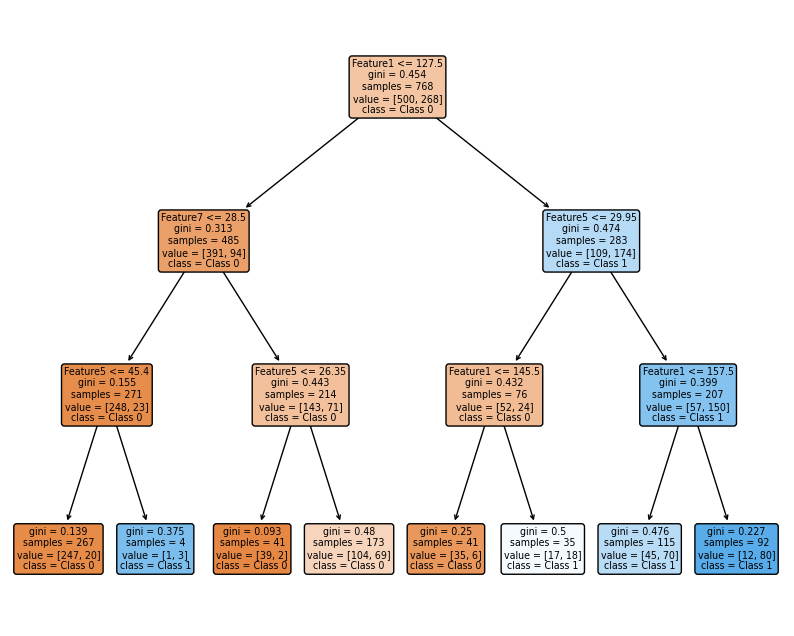

In [3]:
import csv
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

def load_dataset(filename):
    dataset = []
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        next(lines)  # Skip header
        for row in lines:
            for i in range(len(row)):
                row[i] = float(row[i])
            dataset.append(row)
    return dataset

def main():
    filename = 'knn_dataset.csv'
    dataset = load_dataset(filename)

    # Özellik ve etiketleri ayır
    X = [row[:-1] for row in dataset]
    y = [row[-1] for row in dataset]

    # Decision tree modelini oluştur
    model = DecisionTreeClassifier(max_depth=3, min_samples_split=5)
    model.fit(X, y)

    # Decision tree yapısını metin olarak göster
    tree_rules = export_text(model, feature_names=['Feature' + str(i) for i in range(len(X[0]))])
    print(tree_rules)

    # Decision tree yapısını çiz
    fig, ax = plt.subplots(figsize=(10, 8))
    plot_tree(model, feature_names=['Feature' + str(i) for i in range(len(X[0]))], class_names=['Class 0', 'Class 1'], filled=True, rounded=True)
    plt.show()

if __name__ == "__main__":
    main()
